In [1]:
cd("/home/jm2386/Active_Lattice/")
using DrWatson
@quickactivate "Active_Lattice"
include("/home/jm2386/Active_Lattice/src/pm_pdes.jl");
include("/home/jm2386/Active_Lattice/src/pm_sims.jl");
include("/home/jm2386/Active_Lattice/src/pm_plot.jl");
include("/home/jm2386/Active_Lattice/src/Hetrocline.jl");


v3.0
v4.0


In [2]:
function dspp(ρ) 
    α= π/2 -1;
    return -2*( 2*α*(2*α-1)/(2*α+1)*ρ - α) + ( -ρ .+1)*(2*α*(2*α-1)/(2*α+1));
end

F(x) = (1-x)*(ds(x) + dsp(x)*x)
Fp(x) = (1-x)*(2*dsp(x) + dspp(x)*x) - x*(ds(x) + dsp(x)*x)

pcrit(x) = (1-x)*( -Fp(x)/(-ds(x) + (1-x)*dsp(x)) )
G(x) = 2*(1+ds(x))*x/( ( ds(x)^2-F(x) )*pcrit(x) + x*F(x))
H(x) = 2 + (ds(x)*pcrit(x) + F(x) )*G(x)^2

pspin(x;Pe=10.0) = (-2-F(x)*Pe^2)/( ds(x)-dsp(x)*(1-x) )/Pe^2

ϕcrit(x;Pe = 10.0) = (-Fp(x)*Pe^2)/( ds(x)-dsp(x)*(1-x) )/Pe^2 -( dsp(x)-dspp(x)*(1-x)+dsp(x))*(-2-F(x)*Pe^2)/( ds(x)-dsp(x)*(1-x) )^2/Pe^2
ϕaccrit(x;Pe = 10.0) = ϕcrit(x;Pe =Pe)/(1-x) + pspin(x;Pe=Pe)/(1-x)^2

pspin_im(x;Pe=10.0) = ( 2*(1+ds(x))*x/Pe^2 + x*F(x) )/( F(x)- ds(x)^2)

function reimdiff(Pe; Δϕ = 0.001)
    ϕs = collect(Δϕ:Δϕ:(1-Δϕ))
    ϕp1s = pspin.(ϕs;Pe=Pe)
    ϕp2s = pspin_im.(ϕs;Pe=Pe)
    return minimum(ϕp1s.-ϕp2s)
end

function reimcritdiff(Pe; Δϕ = 0.001)
    ϕ = find_zero(x->(pspin.(x;Pe=Pe)/(1-x) - pspin.(x+1e-10;Pe=Pe)/(1-x-1e-10))/1e-10,(0.6,0.99))
    ϕp1 = pspin(ϕ;Pe=Pe)
    ϕp2 = pspin_im(ϕ;Pe=Pe)
    return ϕp1-ϕp2
end


reimcritdiff (generic function with 1 method)

In [114]:
Pe = 6.5
f(x) = 2 + (ds(x)*pcrit(x) + F(x) )*Pe^2 
ϕ_crit = find_zero(f,(0.2,0.9))
ϕa, ϕp = ϕ_crit-pcrit.(ϕ_crit) , pcrit.(ϕ_crit)

(0.5785227634167839, 0.2621877552253814)

In [4]:
function is_complex_pt(ϕa, ϕp; Pe = 10.)
    ϕ  = ϕa + ϕp
    ϕ0 = 1- ϕ
    ds = self_diff(ϕ)
    dsp = self_diff_prime(ϕ)
    expr2 = (β(ϕa, ϕp) + α(ϕa, ϕp)*Pe^2)
    return (expr2^2 - 4*ϕp*β(ϕa, ϕp)*ds^2*Pe^2)
end

is_complex_pt (generic function with 1 method)

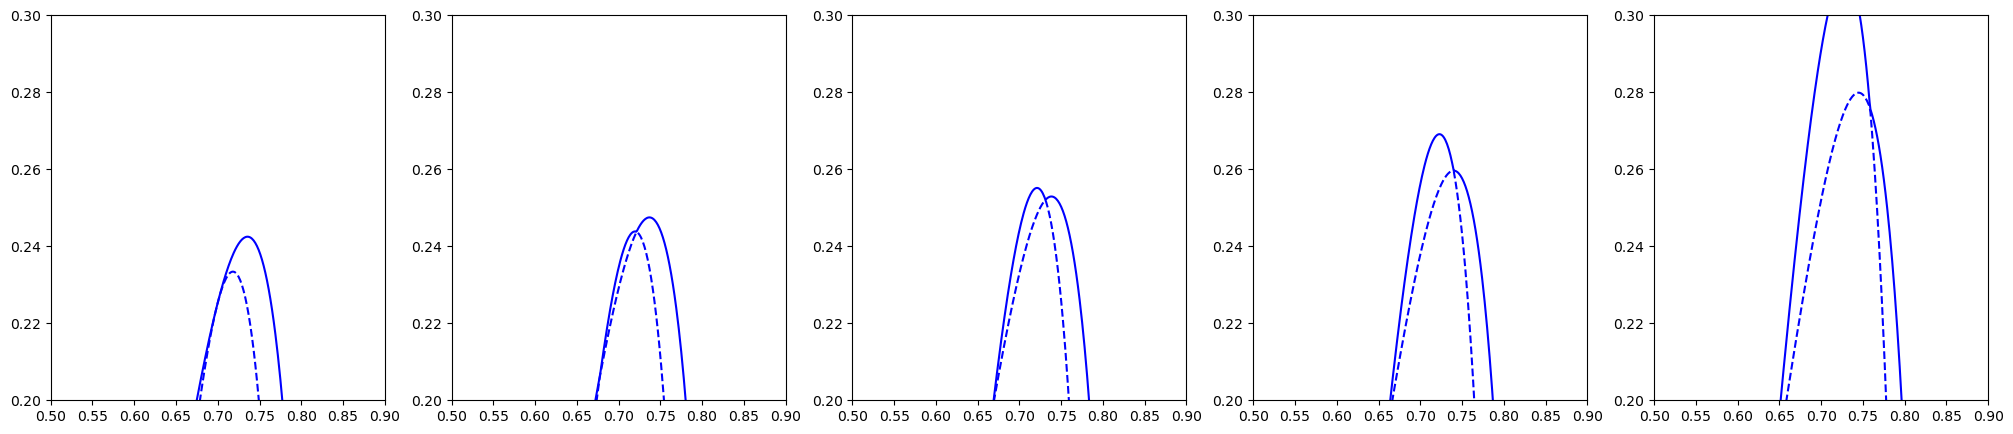

In [87]:
# Pe = 5.042847500637817
# Pe = 5.0
# Pe = 5.05
# Pe = 7.5
Pe1 = find_zero(reimdiff,(5.0,7.5))
Pe2 = find_zero(reimcritdiff,(5.0,7.5))

Pes = [Pe1, Pe1+0.015, Pe2-0.02, Pe2,Pe2+0.06]

using PyPlot
fig, axs = subplots(1,5,figsize=(25,5))

for (ax,Pe) in zip(axs,Pes)
    # f(x) = 2 + (F(x) )*Pe^2 
    # ϕends = find_zeros(f,(0.1,1.0))
    ϕends = [0.01,0.99]
    ϕs = collect(ϕends[1]:0.001:ϕends[2])

    ϕp1s = pspin.(ϕs;Pe=Pe)
    ϕp2s = pspin_im.(ϕs;Pe=Pe)

    ax.plot(ϕs,max.(ϕp1s./(-ϕs.+1),ϕp2s./(-ϕs.+1)); color = "blue")
    ax.plot(ϕs,min.(ϕp1s./(-ϕs.+1),ϕp2s./(-ϕs.+1)); color = "blue", linestyle = "--")

    # ax.plot(ϕs,(-ϕas.+1)./(-ϕs.+1))

    
    # ϕas = ϕs - ϕps
    # ax.plot(ϕas,ϕps)
    # ax.plot(ϕs,(-ϕas.+1)./(-ϕs.+1))
    # ϕ = find_zero(x->ϕcrit(x;Pe =Pe) ,(0.4,0.99))
    # ϕa, ϕp = ϕ-pspin.(ϕ;Pe=Pe) , pspin.(ϕ;Pe=Pe)
    # ax.scatter(ϕa, ϕp; marker = "x", color = "black")

    # ϕ = find_zero(x->(pspin.(x;Pe=Pe)/(1-x) - pspin.(x+1e-10;Pe=Pe)/(1-x-1e-10))/1e-10,(0.6,0.99))

    # ϕa, ϕp = ϕ-pspin.(ϕ;Pe=Pe) , pspin.(ϕ;Pe=Pe)
    # # ax.scatter(ϕa, ϕp; marker = "x", color = "blue")
    # ax.scatter(ϕ, ϕp/(1-ϕ); marker = "x", color = "blue")
    # # ax.scatter(ϕ, (1-ϕa)/(1-ϕ); marker = "x", color = "blue")

    # ϕa, ϕp = ϕ-pspin_im.(ϕ;Pe=Pe) , pspin_im.(ϕ;Pe=Pe)
    # # ax.scatter(ϕa, ϕp; marker = "x", color = "red")
    # # ax.scatter(ϕ, (1-ϕa)/(1-ϕ); marker = "x", color = "red")

    # ax.plot(ϕs,ϕcrit.(ϕps;Pe=Pe))

    # filename = "/store/DAMTP/jm2386/Active_Lattice/data/binodal/Pe=$(Pe).jld2"
    # data = wload(filename)
    # @unpack Pe, γs, ϕ1s, ϕ2s = data

    # ax.plot(ϕ1s,γs.-1; color = "red")
    # ax.plot(ϕ2s,γs.-1; color = "red")

    ax.axis([0.5,0.9,0.2,0.3])

end

# ax.axis([0.65,0.75,0.06,0.08])
# ax.axis([0,1,0.2,0.3])
# ax.axis([0,1,1.0,3.0])
display(fig)
# minimum(is_complex_pt.(ϕas, ϕps; Pe = Pe))

In [22]:
Pe = 5.0
ϕ = find_zero(x->(pspin.(x;Pe=Pe)/(1-x) - pspin.(x+1e-10;Pe=Pe)/(1-x-1e-10))/1e-10,(0.6,0.99))
γ_max = (1-ϕ-pspin.(ϕ;Pe=Pe))/(1-ϕ)
ν_max = (pspin.(ϕ;Pe=Pe))/(1-ϕ)

0.22823031761216026

In [88]:
for Pe in [Pes[2],Pes[5]]
    ϕ = find_zero(x->(pspin.(x;Pe=Pe)/(1-x) - pspin.(x+1e-10;Pe=Pe)/(1-x-1e-10))/1e-10,(0.6,0.99))
    γ_max = (1-ϕ+pspin.(ϕ;Pe=Pe))/(1-ϕ)

    γs, ϕ1s, ϕ2s = [], [], []

    for γ in 1:0.001:(γ_max-0.001)
        try
            find_sol, lower_limits, upper_limits = colapse_sol_interval(;Pe = Pe, γ = γ, initial_Δ = 1e-6, max_iter = 40, tol = 1e-8, atol = 1e-12)
            if find_sol
                ϕ1, ϕ2 = lower_limits[1], upper_limits[2]
                push!(ϕ1s,ϕ1)
                push!(ϕ2s,ϕ2)
                push!(γs,γ)
            end
        catch
            break
        end
    end

    for γ in (γ_max-0.001):0.0001:(γ_max-0.0001)
        try
            find_sol, lower_limits, upper_limits = colapse_sol_interval(;Pe = Pe, γ = γ, initial_Δ = 1e-8, max_iter = 200, tol = 1e-8, atol = 1e-12)
            if find_sol
                ϕ1, ϕ2 = lower_limits[1], upper_limits[2]
                push!(ϕ1s,ϕ1)
                push!(ϕ2s,ϕ2)
                push!(γs,γ)
            end
        catch
            break
        end
    end

    for γ in (γ_max-0.0001):0.00001:(γ_max-0.00001)
        try
            find_sol, lower_limits, upper_limits = colapse_sol_interval(;Pe = Pe, γ = γ, initial_Δ = 1e-8, max_iter = 200, tol = 1e-8, atol = 1e-12)
            if find_sol
                ϕ1, ϕ2 = lower_limits[1], upper_limits[2]
                push!(ϕ1s,ϕ1)
                push!(ϕ2s,ϕ2)
                push!(γs,γ)
            end
        catch
            break
        end
    end

    for γ in (γ_max-0.00001):0.000001:(γ_max)
        try
            find_sol, lower_limits, upper_limits = colapse_sol_interval(;Pe = Pe, γ = γ, initial_Δ = 1e-8, max_iter = 200, tol = 1e-8, atol = 1e-12)
            if find_sol
                ϕ1, ϕ2 = lower_limits[1], upper_limits[2]
                push!(ϕ1s,ϕ1)
                push!(ϕ2s,ϕ2)
                push!(γs,γ)
            end
        catch
            break
        end
    end

    filename = "/store/DAMTP/jm2386/Active_Lattice/data/binodal/Pe=$(Pe).jld2"
    data = Dict{String,Any}()
    @pack! data = Pe, γs, ϕ1s, ϕ2s
    safesave(filename,data)
end

# filename = "/store/DAMTP/jm2386/Active_Lattice/data/binodal/Pe=$(Pe).jld2"
# data = wload(filename)
# @unpack Pe, γs, ϕ1s, ϕ2s = data



In [68]:
ϕ = find_zero(x->(pspin.(x;Pe=Pe)/(1-x) - pspin.(x+1e-14;Pe=Pe)/(1-x-1e-14))/1e-14,(0.6,0.99))
γ_max = (1-ϕ+pspin.(ϕ;Pe=Pe))/(1-ϕ)

1.24917242106453

In [56]:
Pe = Pes[2]
filename = "/store/DAMTP/jm2386/Active_Lattice/data/binodal/Pe=$(Pe).jld2"
data = wload(filename)
@unpack Pe, γs, ϕ1s, ϕ2s = data

Dict{String, Any} with 4 entries:
  "γs"  => Any[1.0, 1.001, 1.002, 1.003, 1.004, 1.005, 1.006, 1.007, 1.008, 1.0…
  "ϕ1s" => Any[0.35629, 0.357639, 0.358987, 0.360333, 0.361677, 0.363021, 0.364…
  "Pe"  => 5.06285
  "ϕ2s" => Any[0.860976, 0.860838, 0.860699, 0.86056, 0.86042, 0.86028, 0.86013…

In [58]:
γs

229-element Vector{Any}:
 1.0
 1.001
 1.002
 1.003
 1.004
 1.005
 1.006
 1.007
 1.008
 1.009
 ⋮
 1.22
 1.221
 1.222
 1.223
 1.224
 1.225
 1.226
 1.227
 1.2491724691986796

In [79]:
γ = 1.2482
find_sol, lower_limits, upper_limits = colapse_sol_interval(;Pe = Pe, γ = γ, initial_Δ = 1e-8, max_iter = 200, tol = 1e-8, atol = 1e-12)

(true, (0.7240095773724164, 0.7240095815566683), (0.7497238785298306, 0.7497238828952273))

In [63]:
ϕ1s

229-element Vector{Any}:
 0.3562903181396119
 0.3576391551474577
 0.3589866158956816
 0.3603327113270701
 0.3616774524091394
 0.3630208501350328
 0.36436291552430533
 0.36570365962379864
 0.36704309350850706
 0.3683812282824218
 ⋮
 0.6520295380524374
 0.6537878852872566
 0.6555662000993239
 0.6573656779519852
 0.659187633465339
 0.6610335125490526
 0.6629049128262982
 0.6648036068867914
 0.737310341165615